# Logistic regression

# Dataset:
German Credit

# Objective
Estimate default probabilities using logistic regression

# 1. Load Libraries and data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df =pd.read_excel(r'GermanCredit.xlsx')

In [4]:
df.head()

,Creditability,CreditAmount,DurationOfCreditInMonths
0,1,1049,18
1,1,2799,9
2,1,841,12
3,1,2122,12
4,1,2171,12


# 2. Check how many records do we have


In [5]:
df.shape

(1000, 3)

# 3. Plot Histogram for column 'CreditAmount'

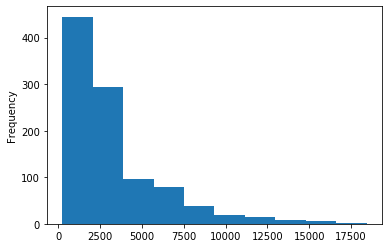

In [7]:
df.CreditAmount.plot(kind ='hist')

# 3b. Create creditability dataframe

In [9]:
df.Creditability.value_counts()

1    700
0    300
Name: Creditability, dtype: int64

# 4. Concatenate the above 2 dataframes and give the total of Credibiliity0 and Credibiliity1

# 5. Plot Creditworthiness plot for Credibility == 0 and also ==1

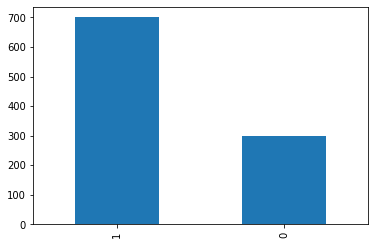

In [10]:
df.Creditability.value_counts().plot(kind ='bar')

# 6. Prepare input data for the model

In [11]:
y = df.Creditability

x = df.drop(columns = 'Creditability')

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( x, y, test_size=0.30, random_state=1)

# 7. Fit logistic regression model

In [47]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(max_iter=100,n_jobs=-1)
lr.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

# 8. Test accuracy calculation

In [48]:
lr.score(X_train,y_train) ,lr.score(X_test,y_test)

(0.7128571428571429, 0.6933333333333334)

# 9. Build a confusion matrix

In [49]:
def evaluation_train_test(model,X_train,y_train,X_test,y_test):
    y_train_prob = model.predict_proba(X_train)[:,1]
    y_train_pred = model.predict(X_train)
    y_test_prob = model.predict_proba(X_test)[:,1]
    y_test_pred = model.predict(X_test)
    from sklearn.metrics import confusion_matrix,accuracy_score,roc_auc_score,roc_curve,classification_report
    print('Train accuracy score of',model,':',accuracy_score(y_train,y_train_pred))
    print('Test accuracy score of ',model,':',accuracy_score(y_test,y_test_pred))
    
    print('rou_auc_score',roc_auc_score(y_train,y_train_prob))
    print('rou_auc_score',roc_auc_score(y_test,y_test_prob))
    print('Train classification report \n',classification_report(y_train,y_train_pred))
    print('Test classification report \n',classification_report(y_test,y_test_pred))

    
    fig,axes =plt.subplots(1,2,figsize =(15,5))
    sns.heatmap(confusion_matrix(y_train,y_train_pred),annot =True,fmt ='g',ax =axes[0])
    #plt.show()
    sns.heatmap(confusion_matrix(y_test,y_test_pred),annot =True,fmt ='g',ax =axes[1])
    plt.show()
    
    def roc_curves(y_true,y_true_prob):
          
          fpr, tpr, thresholds  =roc_curve(y_true,y_true_prob)
          thresholds[0] = thresholds[0]-1
          plt.plot(fpr,tpr)
          plt.plot(fpr,fpr)
          plt.plot(fpr,thresholds)
          plt.show();
    print('roc curve for Train')
    roc_curves(y_train,y_train_prob)
    print('roc curve for Test')
    roc_curves(y_test,y_test_prob)
          

Train accuracy score of LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False) : 0.7128571428571429
Test accuracy score of  LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False) : 0.6933333333333334
rou_auc_score 0.6243288279948157
rou_auc_score 0.6251643093748358
Train classification report 
               precision    recall  f1-score   support

           0       0.58      0.13      0.22       209
           1       0.72      0.96      0.82       491

  

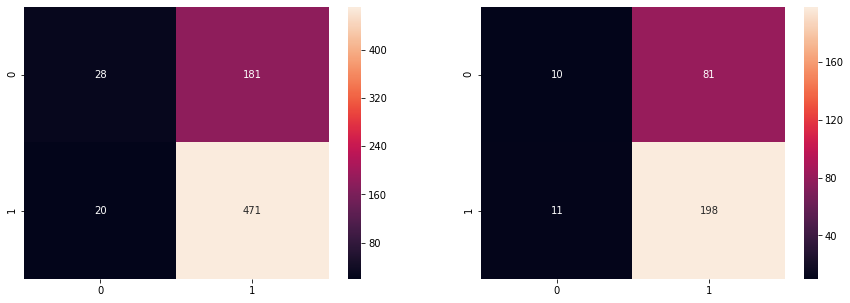

roc curve for Train


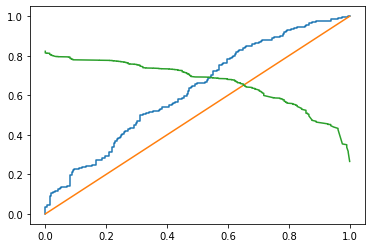

roc curve for Test


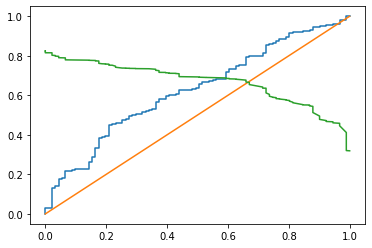

In [50]:
evaluation_train_test(lr,X_train,y_train, X_test,y_test)

# 10.  Predicted Probability distribution Plots for Defaults and Non Defaults

In [51]:
y_train_prob = lr.predict_proba(X_train)[:,1]
y_train_pred = lr.predict(X_train)
y_test_prob = lr.predict_proba(X_test)[:,1]
y_test_pred = lr.predict(X_test)


In [52]:
y_train =np.array(y_train)
y_test =np.array(y_test)

In [53]:
restrain =pd.DataFrame({'y_train':y_train,'y_train_prob':y_train_prob,'y_train_pred':y_train_pred})
restest =pd.DataFrame({'y_test':y_test,'y_test_prob':y_test_prob,'y_test_pred':y_test_pred})

In [54]:
train_defaults =restrain[restrain['y_train']==1]['y_train_prob']
train_non_defaults =restrain[restrain['y_train']==0]['y_train_prob']
test_defaults =restest[restest['y_test']==1]['y_test_prob']
test_non_defaults =restest[restest['y_test']==0]['y_test_prob']

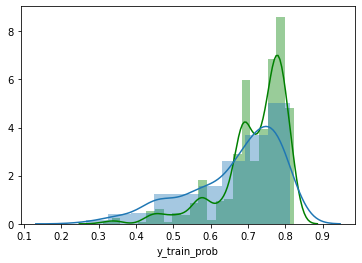

In [55]:
sns.distplot(train_defaults,color='g')
sns.distplot(train_non_defaults)
plt.show()

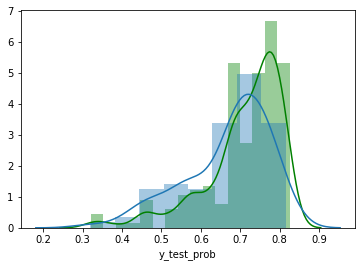

In [56]:
sns.distplot(test_defaults,color='g')
sns.distplot(test_non_defaults)
plt.show()